In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-00-archives-00.html'
url_last = 'http://www.jpx.co.jp/markets/statistics-equities/investor-type/00-00-archives-01.html'

In [3]:
rq = requests.get(url)
rq_last = requests.get(url_last)

In [4]:
rq.encoding

'ISO-8859-1'

In [5]:
rq.encoding = rq.apparent_encoding
rq_last.encoding = rq_last.apparent_encoding

In [6]:
soup = BeautifulSoup(rq.text, 'html.parser')
soup_last = BeautifulSoup(rq_last.text, 'html.parser')

In [7]:
a_tags = soup.find_all('a')
a_tags_last = soup_last.find_all('a')

In [8]:
type(a_tags)

bs4.element.ResultSet

In [9]:
a_tags[1]

<a href="/learning/tour/index.html">見学</a>

In [10]:
a_tags[1].get('href')

'/learning/tour/index.html'

In [11]:
list_xls = []
for a_tag in a_tags:
    if ('xls' in a_tag.get('href')) and ('val' in a_tag.get('href')):
        list_xls.append(a_tag.get('href'))
for a_tag in a_tags_last:
    if ('xls' in a_tag.get('href')) and ('val' in a_tag.get('href')):
        list_xls.append(a_tag.get('href'))

In [12]:
list_xls

['/markets/statistics-equities/investor-type/nlsgeu0000034q54-att/stock_val_1_180504.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000034d43-att/stock_val_1_180503.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000033zam-att/stock_val_1_180502.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000033ltn-att/stock_val_1_180501.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000033g4z-att/stock_val_1_180404.xls',
 '/markets/statistics-equities/investor-type/nlsgeu000003327q-att/stock_val_1_180403.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000032b8c-att/stock_val_1_180402.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000032ara-att/stock_val_1_180401.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000031wxo-att/stock_val_1_180304.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000031g2w-att/stock_val_1_180303.xls',
 '/markets/statistics-equities/investor-type/nlsgeu0000030gfq-att/stock_val_1_180302.xls',

In [13]:
base_url = 'http://www.jpx.co.jp'

In [14]:
import os
import urllib.request

In [15]:
for i, x in enumerate(list_xls):
    url = base_url + x
    urllib.request.urlretrieve(url,'temp/temp'+ str(i) + '.xls')

In [16]:
import xlrd
from datetime import datetime

In [17]:
foreign_pos = []
for i in range(len(list_xls)):
    book = xlrd.open_workbook('temp/temp' + str(i) + '.xls')
    sheet = book.sheet_by_name('Tokyo & Nagoya')
    dt_org = sheet.cell_value(3, 0)
    dt_ = dt_org.split('年')[0] + '/' + dt_org.split(' ')[-2]
    dt = datetime.strptime(dt_, '%Y/%m/%d')
    foreign_pos.append([dt,
                        int(''.join((sheet.cell_value(29,10) 
                                     + sheet.cell_value(30,10)).split(',')))])

In [72]:
foreign_pos

In [73]:
x = [row[0] for row in foreign_pos]
y = [row[1] for row in foreign_pos]

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [75]:
plt.style.use('ggplot')

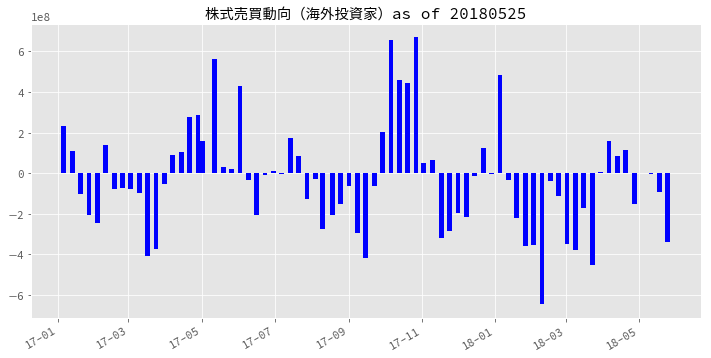

In [76]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(x, y, width = 4, color='blue')
plt.title('株式売買動向（海外投資家）as of ' + foreign_pos[0][0].strftime('%Y%m%d'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
fig.autofmt_xdate()